**Importing the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns; sns.set()
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras import layers
from keras import backend as K
import copy
from sklearn.metrics import mean_squared_error
import json
from keras.utils.conv_utils import convert_kernel
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_excel(('/content/drive/MyDrive/Train_radarpaint.xlsx'), header = None)
test_df = pd.read_excel(('/content/drive/MyDrive/Test_radarpaint.xlsx'), header = None)

# Transposing rows to columns
train_df = train_df.transpose()
test_df = test_df.transpose()

In [ ]:
# Convert into csv file 
train_df.to_csv ("Train.csv",  
                  index = None, 
                  header=True)

test_df.to_csv ("Test.csv",  
                  index = None, 
                  header=True)

test = pd.DataFrame(pd.read_csv("Test.csv")) 
train = pd.DataFrame(pd.read_csv("Train.csv")) 

**Splitting the dataset into attributes (X) and labels (y)**

In [ ]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1:]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1:]

In [ ]:
# 10,000 columns is very high lets reduce this using 
# Dimensionality Reduction using PCA 

import plotly.express as px
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Genetic Algorithm

In [ ]:
inputs = np.array(X_train)
targets = np.array(y_train)

In [ ]:
num_components = 5

In [ ]:
chromosome_length = num_components*11 + 11 + 11*833 + 833+ 833*1 + 1

In [ ]:
chromosomes = np.random.uniform(-1, 1, (1, chromosome_length))
i=1

# NEW MODEL

In [ ]:
zero_weights = copy.deepcopy(chromosomes[i-1][:55])
zero_weights = zero_weights.reshape(5, 11)
zero_bias = copy.deepcopy(chromosomes[i-1][55:66])
zero_bias = zero_bias.reshape(11, )
one_weights = copy.deepcopy(chromosomes[i-1][66:9229])
one_weights = one_weights.reshape(11, 833)
one_bias = copy.deepcopy(chromosomes[i-1][9229:10062])
one_bias = one_bias.reshape(833, )
two_weights = copy.deepcopy(chromosomes[i-1][10062:10895])
two_weights = two_weights.reshape(833, 1)
two_bias = copy.deepcopy(chromosomes[i-1][10895])
two_bias = two_bias.reshape(1, )
# Define Model
model = keras.Sequential([layers.Dense(11, activation = 'relu', weights=[zero_weights, zero_bias], kernel_initializer=None, bias_initializer=None),  
                                      layers.Dense(833, activation = 'relu', weights=[one_weights, one_bias], kernel_initializer=None, bias_initializer=None),
                                      layers.Dense(1, weights=[two_weights, two_bias], kernel_initializer=None, bias_initializer=None)])
# Compile Model
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01),loss='mse')
model.fit(inputs, targets, epochs=100, batch_size=150, shuffle=False)
weights = model.get_weights() 
prediction_test = model.predict(X_test)
mse=mean_squared_error(prediction_test,y_test)
print(mse)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 4817539.0156
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 145445641.0000
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 13827010.3750
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 34876965.5000
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 774861.6250
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 7082070.5625
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 2186118.9062
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 669203.3789
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 850153.1602
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 65645.0967
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 256087.3887
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 1622

In [ ]:
class Genetic:
    ''' 
        If this function is called without passing any arguments, then an initial random chromosomes and fitness values are generated.
        Else if the function is called by passing the chromosomes and fitness values as arguments, then the passed values will be stored in 
        the class variables. The chromosomes and fitness values that are passed to this function are loaded from the google drive
     '''
    def __init__(self, chromosomes = np.random.uniform(-1, 1, (12, 115)), tot_fitness=np.zeros((12))):
        self.chromosomes = chromosomes
        self.tot_fitness = tot_fitness
        self.num_chromosomes = 12


    ''' 
        When this function is called, this function first initializes a temporary variable (cur_fitness) to store 
        the fitness values calculated in this function.
        A for loop is run 12 times(number of chromosomes in a generation)
        And in each iteration of the for loop, the function fits the model for train dataset using the weights of that chromosome and
        calculates the MSE for the test dataset for the trained model. All the MSE values of each chromosome are stored in the cur_fitness variable.
        This cur_fitness variable is copied to the tot_fitness variable, and these fitness values are returned.
    '''
    def cal_fitness(self):
        cur_fitness = np.zeros((self.num_chromosomes))
        for i in range(1, self.chromosomes.shape[0]+1):
            zero_weights = copy.deepcopy(self.chromosomes[i-1][:25])
            zero_weights = zero_weights.reshape(5, 5)
            zero_bias = copy.deepcopy(self.chromosomes[i-1][25:30])
            zero_bias = zero_bias.reshape(5, )
            one_weights = copy.deepcopy(self.chromosomes[i-1][30:90])
            one_weights = one_weights.reshape(5, 12)
            one_bias = copy.deepcopy(self.chromosomes[i-1][90:102])
            one_bias = one_bias.reshape(12, )
            two_weights = copy.deepcopy(self.chromosomes[i-1][102:114])
            two_weights = two_weights.reshape(12, 1)
            two_bias = copy.deepcopy(self.chromosomes[i-1][114])
            two_bias = two_bias.reshape(1, )
            # Define Model
            model = keras.Sequential([layers.Dense(5, activation = 'sigmoid', weights=[zero_weights, zero_bias], kernel_initializer=None, bias_initializer=None),  
                                      layers.Dense(12, activation = 'sigmoid', weights=[one_weights, one_bias], kernel_initializer=None, bias_initializer=None),
                                      layers.Dense(1, weights=[two_weights, two_bias], kernel_initializer=None, bias_initializer=None)])
            # Compile Model
            model.compile(loss='mse',optimizer=keras.optimizers.RMSprop(learning_rate=0.008),metrics=['mse'])
            model.fit(inputs, targets, epochs=100, batch_size=8, shuffle=False)
            prediction_test = model.predict(X_test)
            mse=mean_squared_error(prediction_test,y_test)
            cur_fitness[i-1] = mse
        self.tot_fitness = copy.deepcopy(cur_fitness)
        return cur_fitness #send to selection


    ''' 
        cur_fitness (which is returned by the above function) is passed as an argument to this function.
        A dictionary named "selected" is initialized. A temporary variable (temp) is created by copying cur_fitness variable.
        The temp variable is sorted (this is done because after sorting the first element is the one with least
        fitness value[MSE], so that would be the best particle of this generation && the last element is the one with the 
        highest fitness value[MSE], so that element would be the worst particle). Then the 6 best particles are chosen as 
        parents. The 3 worst particles are chosen to be replaced. The indeces of these selected particles are stored in the 
        "selected"(name of the dictionary) dictionary. This dictionary is returned.
    '''
    def selection(self, cur_fitness):
        selected = {}
        temp = copy.deepcopy(cur_fitness)
        temp = np.sort(temp)
        p1, = np.where(cur_fitness == temp[0])
        p2, = np.where(cur_fitness == temp[1])
        p3, = np.where(cur_fitness == temp[2])
        p4, = np.where(cur_fitness == temp[3])
        p5, = np.where(cur_fitness == temp[4])
        p6, = np.where(cur_fitness == temp[5])
        bad1, = np.where(cur_fitness == temp[11])
        bad2, = np.where(cur_fitness == temp[10])
        bad3, = np.where(cur_fitness == temp[9])
        selected["p1"] = [p1[0], p2[0]]
        selected["p2"] = [p3[0], p4[0]]
        selected["p3"] = [p5[0], p6[0]]
        selected["bad"] = [bad1[0], bad2[0], bad3[0]]
        return selected #send to crossover


    ''' 
        "selected" and cur_fitness (which were returned by the above functions) are passed as arguments to this function.
        The variables are initialized (child1, child2 & child3) to store the newly generated children.
        6 Parent variables are loaded from the "selected" dictionary.
        Since the length of each chromosome is 85, we iterate a for loop 85 times, 
        and each time, if we randomly choose a prob which is either 0 or 1, 
        and if the prob is 0, then odd number parent's chromosome is copied to the child.
        If the prob is 1, then the even numbered parent's chromomsome is copied to the child.
        After these children are generated, these children replace the 3 bad chromosomes.
    ''' 
    def crossover(self, selected, cur_fitness):
        child1 = np.zeros(115)
        child2 = np.zeros(115)
        child3 = np.zeros(115)
        parent1 = self.chromosomes[selected["p1"][0]]
        parent2 = self.chromosomes[selected["p1"][1]]
        parent3 = self.chromosomes[selected["p2"][0]]
        parent4 = self.chromosomes[selected["p2"][1]]
        parent5 = self.chromosomes[selected["p3"][0]]
        parent6 = self.chromosomes[selected["p3"][1]]
        prob = np.random.randint(0, 2, (115))
        for i in range(115):
            if prob[i] == 0:
                child1[i] = parent1[i]
                child2[i] = parent3[i]
                child3[i] = parent5[i]
            else:
                child1[i] = parent2[i]
                child2[i] = parent4[i]
                child3[i] = parent6[i]
        self.chromosomes[selected["bad"][0], :] = child1[:] 
        self.chromosomes[selected["bad"][1], :] = child2[:]
        self.chromosomes[selected["bad"][2], :] = child3[:]
        return  #send to mutation
    
    ''' 
        In this function, we randomly choose 10% of the chromosomes to be changed. And the new value in the chromosome 
        is chosen by using a gaussian distribution with (mean = value of that chromosome) and (standard deviation = 0)
    ''' 
    def mutation(self):
        for i in range(self.num_chromosomes):
            gene = self.chromosomes[i]
            if random.uniform(0.00, 1.00) <= 0.1:
                gene = random.gauss(mu=gene, sigma=0)
            self.chromosomes[i][:] = gene
        return 

In [ ]:
import time
start_time = time.time()
num_generations = 10
genetic = Genetic()
for i in range(num_generations):
    print("Generation: ", i)
    cur_fitness = genetic.cal_fitness()
    print(cur_fitness)
    selected = genetic.selection(cur_fitness)
    print("\n")
    print(selected)
    genetic.crossover(selected, cur_fitness)
    genetic.mutation()
    print("\n")
    print(genetic.tot_fitness)
    np.save('/content/drive/MyDrive/' + str(i) + '_chromosomes', genetic.chromosomes)
    np.save('/content/drive/MyDrive/' + str(i) + '_tot_fitness', genetic.tot_fitness)
print("--- %s seconds ---" % (time.time() - start_time))

Streaming output truncated to the last 5000 lines.
Epoch 34/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0494 - mse: 0.0494
Epoch 35/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0476 - mse: 0.0476
Epoch 36/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0501 - mse: 0.0501
Epoch 37/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0483 - mse: 0.0483
Epoch 38/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0493 - mse: 0.0493
Epoch 39/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0511 - mse: 0.0511
Epoch 40/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0681 - mse: 0.0681
Epoch 41/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0589 - mse: 0.0589
Epoch 42/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0607 - mse: 0.0607
Epoch 43/100
129/129 [==============================] - 0s 3ms/step - loss: 

In [ ]:
chromosomes = np.load('/content/drive/MyDrive/25_chromosomes.npy')
tot_fitness = np.load('/content/drive/MyDrive/25_tot_fitness.npy')
genetic = Genetic(chromosomes = chromosomes, tot_fitness=tot_fitness)
num_generations = 500
for i in range(32, num_generations):
    print("Generation: ", i+1)
    cur_fitness = genetic.cal_fitness()
    selected = genetic.selection(cur_fitness)
    genetic.crossover(selected, cur_fitness)
    genetic.mutation()
    np.save('/content/drive/MyDrive/' + str(i) + '_chromosomes', genetic.chromosomes)
    np.save('/content/drive/MyDrive/' + str(i) + '_tot_fitness', genetic.tot_fitness)

In [ ]:
chromosomes = np.load('/content/drive/MyDrive/999_chromosomes.npy')
tot_fitness = np.load('/content/drive/MyDrive/999_tot_fitness.npy')
#minInd = np.argmin(tot_fitness)
for minInd in range(12):
    print(minInd)
    i = minInd
    zero_weights = copy.deepcopy(chromosomes[i-1][:25])
    zero_weights = zero_weights.reshape(5, 5)
    zero_bias = copy.deepcopy(chromosomes[i-1][25:30])
    zero_bias = zero_bias.reshape(5, )
    one_weights = copy.deepcopy(chromosomes[i-1][30:90])
    one_weights = one_weights.reshape(5, 12)
    one_bias = copy.deepcopy(chromosomes[i-1][90:102])
    one_bias = one_bias.reshape(12, )
    two_weights = copy.deepcopy(chromosomes[i-1][102:114])
    two_weights = two_weights.reshape(12, 1)
    two_bias = copy.deepcopy(chromosomes[i-1][114])
    two_bias = two_bias.reshape(1, )
    # Define Model
    model = keras.Sequential([layers.Dense(5, activation = 'sigmoid', weights=[zero_weights, zero_bias], kernel_initializer=None, bias_initializer=None),  
                                      layers.Dense(12, activation = 'sigmoid', weights=[one_weights, one_bias], kernel_initializer=None, bias_initializer=None),
                                      layers.Dense(1, weights=[two_weights, two_bias], kernel_initializer=None, bias_initializer=None)])
    # Compile Model
    model.compile(loss='mse',optimizer=keras.optimizers.RMSprop(learning_rate=0.008),metrics=['mse'])
    model.fit(inputs, targets, epochs=100, batch_size=8, shuffle=False)
    prediction_test = model.predict(X_test)
    mse=mean_squared_error(prediction_test,y_test)
    tot_fitness[minInd] = mse
    print(mse)
minInd = np.argmin(tot_fitness)
print(tot_fitness[minInd])
if 1:
    zero_weights = copy.deepcopy(chromosomes[i-1][:25])
    zero_weights = zero_weights.reshape(5, 5)
    zero_bias = copy.deepcopy(chromosomes[i-1][25:30])
    zero_bias = zero_bias.reshape(5, )
    one_weights = copy.deepcopy(chromosomes[i-1][30:90])
    one_weights = one_weights.reshape(5, 12)
    one_bias = copy.deepcopy(chromosomes[i-1][90:102])
    one_bias = one_bias.reshape(12, )
    two_weights = copy.deepcopy(chromosomes[i-1][102:114])
    two_weights = two_weights.reshape(12, 1)
    two_bias = copy.deepcopy(chromosomes[i-1][114])
    two_bias = two_bias.reshape(1, )
    # Define Model
    model = keras.Sequential([layers.Dense(5, activation = 'sigmoid', weights=[zero_weights, zero_bias], kernel_initializer=None, bias_initializer=None),  
                                      layers.Dense(12, activation = 'sigmoid', weights=[one_weights, one_bias], kernel_initializer=None, bias_initializer=None),
                                      layers.Dense(1, weights=[two_weights, two_bias], kernel_initializer=None, bias_initializer=None)])
    # Compile Model
    model.compile(loss='mse',optimizer=keras.optimizers.Adam(learning_rate=0.008),metrics=['mse'])
    model.fit(inputs, targets, epochs=100, batch_size=8, shuffle=False)
    prediction_test = model.predict(X_test)
    mse=mean_squared_error(prediction_test,y_test)
    print("Best MSE is: ", mse)

0
Epoch 1/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0708 - mse: 0.0708
Epoch 4/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0687 - mse: 0.0687
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0701 - mse: 0.0701
Epoch 6/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0700 - mse: 0.0700
Epoch 7/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0710 - mse: 0.0710
Epoch 8/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0706 - mse: 0.0706
Epoch 9/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0712 - mse: 0.0712
Epoch 10/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0694 - mse: 0.0694
Epoch 11/100
129/129 [===============

**Evaluating keras baseline model**

In [ ]:
x = np.arange(1, 101)

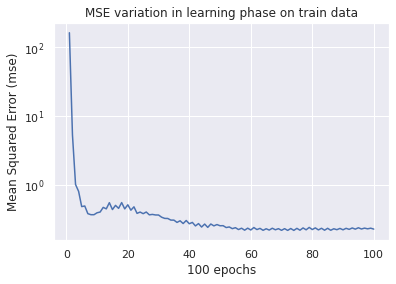

In [ ]:
import matplotlib.pyplot as plt 
  
# plotting the points  
plt.plot(x, history.history["loss"]) 
  
# naming the x axis 
plt.xlabel('100 epochs') 
# naming the y axis 
plt.ylabel('Mean Squared Error (mse)') 

# giving a title to my graph 
plt.title('MSE variation in learning phase on train data') 
plt.yscale('log')
# function to show the plot 
plt.show() 

In [ ]:
prediction_test = model.predict(X_test)
prediction_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, prediction_test)
print("MSE is: ", mse)

In [ ]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, prediction_test)
r2_train = r2_score(y_train, prediction_train)

In [ ]:
print("R2 train data: " + str(r2_train))
print("R2 test data: " + str(r2_test))

In [ ]:
y_test = np.array(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y_train = np.array(y_train)

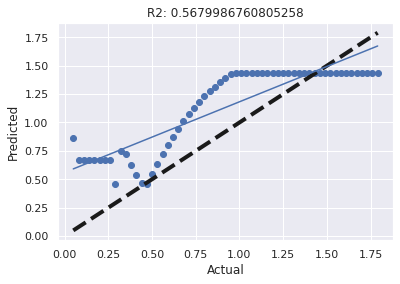

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, prediction_test = y_test.reshape(-1,1), prediction_test.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, prediction_test).predict(y_test))
ax.set_title('R2: ' + str(r2_score(y_test, prediction_test)))
plt.show()